In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
data = 'gapminder-FiveYearData.csv'
td = pd.read_csv(data)
td.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [3]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
year         1704 non-null int64
pop          1704 non-null float64
continent    1704 non-null object
lifeExp      1704 non-null float64
gdpPercap    1704 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


In [4]:
#pivot table
table = pd.pivot_table(td, values='lifeExp', index=['year'],
                    columns=['continent'], aggfunc=np.sum)
table

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,2035.046,1331.996,1528.37500,1932.255,138.510
1957,2145.850,1399.007,1627.51196,2001.092,140.590
1962,2252.611,1459.969,1701.58636,2056.177,142.170
1967,2357.396,1510.273,1803.90012,2092.128,142.620
1972,2467.449,1559.873,1891.53588,2123.251,143.820
1977,2578.182,1609.789,1967.14836,2158.133,145.710
1982,2682.829,1655.721,2066.39200,2184.192,148.580
1987,2773.929,1702.268,2140.08900,2209.265,150.640
1992,2788.738,1739.209,2195.72800,2233.203,153.890


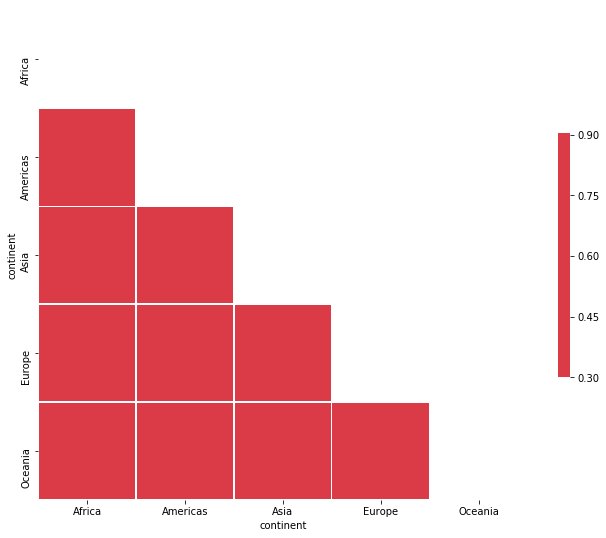

In [5]:
# Compute the correlation matrix
corr = table.corr()
#Visualize the correlation using seaborn: Please refer to https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
f.savefig('corr.png', dpi=400)